### PART1 

Importing necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
testdata=pd.read_csv("FMLA1Q1Data_train.csv")
testdata.columns = ['x1', 'x2', 'y']
print(testdata.head())

        x1       x2        y
0  1.83390 -0.66911  11.1090
1 -2.25880 -0.40032  22.0270
2  0.86217 -0.67180   2.4278
3  0.31877  0.57563   6.5156
4 -1.30770 -0.77809  12.0960


In [20]:
X = testdata.iloc[:, :-1].values

In [21]:
y=testdata.iloc[:,-1].values

without bias

In [22]:
XT=np.transpose(X)
XXT = np.dot(XT, X)
XXT_inv = np.linalg.inv(XXT)
XY = np.dot(XT, y)
wML = np.dot(XXT_inv, XY)
print(wML)

[1.44254066 3.87989678]


with bias

In [23]:
X_bias = np.c_[np.ones(X.shape[0]), X]
XT=np.transpose(X_bias)
XXT = np.dot(XT, X_bias)
XXT_inv = np.linalg.inv(XXT)
XY = np.dot(XT, y)
wML = np.dot(XXT_inv, XY) 
print(wML)

[9.89748796 1.76772698 3.52384387]


### PART2

In [14]:
step_size = 0.001  
num_iterations = 1000
#Data Points
n = X_bias.shape[0]   
print(n)
#N0.0f features
d = X_bias.shape[1] 
print(d)

999
3


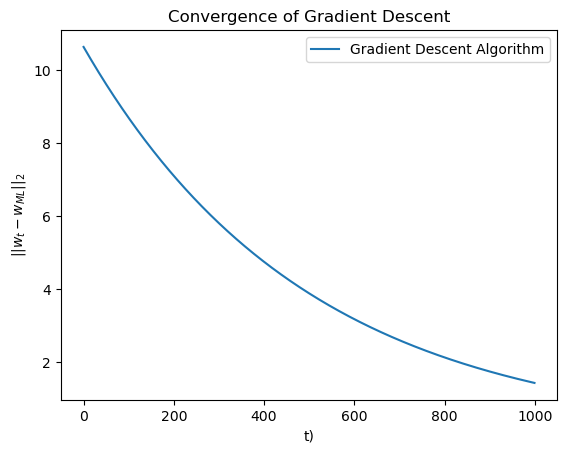

In [15]:
w = np.zeros(d)
Euclidean_distances = []

# Gradient Descent Algorithm
for t in range(num_iterations):
    gradient = (2 / n) * np.dot(X_bias.T, (np.dot(X_bias, w) - y))
    w = w - step_size * gradient
    distance = np.linalg.norm(w - wML)
    Euclidean_distances.append(distance)
plt.plot(range(num_iterations), Euclidean_distances, label='Gradient Descent Algorithm')
plt.xlabel('t)')
plt.ylabel(r'$||w_t - w_{ML}||_2$')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

### PART3

In [24]:
batch_size = 100  
step_size= 0.001 
num_iterations = 1000  
w_sgd = np.zeros(d)
print(w_sgd)
Euclidean_distances_sgd = []

[0. 0. 0.]


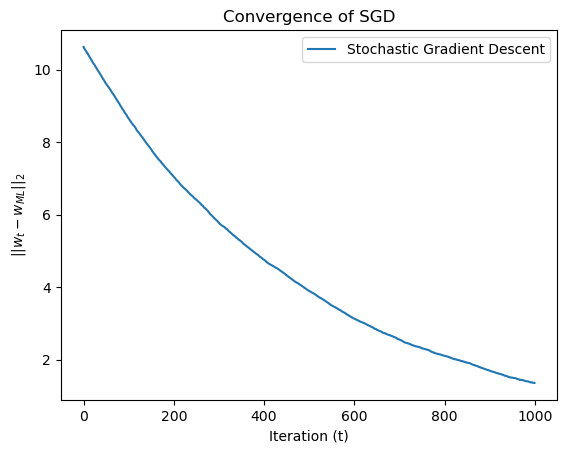

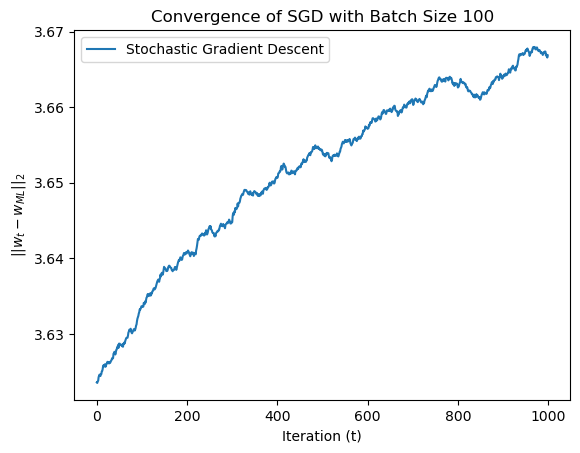

In [17]:
for t in range(num_iterations):
    batch_indices = np.random.choice(n, batch_size, replace=True)  # Allow replacement
    X_batch = X_bias[batch_indices]
    y_batch = y[batch_indices]
    gradient_sgd = (2 / batch_size) * np.dot(X_batch.T, (np.dot(X_batch, w_sgd) - y_batch))
    w_sgd = w_sgd - step_size * gradient_sgd
    
    distance_sgd = np.linalg.norm(w_sgd - wML)
    Euclidean_distances_sgd.append(distance_sgd)

plt.plot(range(num_iterations), Euclidean_distances_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration (t)')
plt.ylabel(r'$||w_t - w_{ML}||_2$')
plt.title('Convergence of SGD')
plt.legend()
plt.show()


def stochastic_gradient_descent(X, y, wML, batch_size=100, step_size=0.001, num_iterations=1000):
    n, d = X.shape
    w_sgd = np.zeros(d)
    Euclidean_distances_sgd = []

    for t in range(num_iterations):
        batch_indices = np.random.choice(n, batch_size, replace=True)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        # Compute the gradient for the batch
        gradient_sgd = (2 / batch_size) * np.dot(X_batch.T, (np.dot(X_batch, w_sgd) - y_batch))

        # Update the weight vector using the gradient
        w_sgd = w_sgd - step_size * gradient_sgd

        # Calculate the Euclidean distance between w_sgd and wML
        distance_sgd = np.linalg.norm(w_sgd - wML)
        Euclidean_distances_sgd.append(distance_sgd)

    # Plot the Euclidean distance as a function of iterations
    plt.plot(range(num_iterations), Euclidean_distances_sgd, label='Stochastic Gradient Descent')
    plt.xlabel('Iteration (t)')
    plt.ylabel(r'$||w_t - w_{ML}||_2$')
    plt.title('Convergence of SGD with Batch Size 100')
    plt.legend()
    plt.show()

    return w_sgd, Euclidean_distances_sgd

# Example usage
X = np.random.randn(1000, 3)  # Random dataset with 1000 samples and 3 features
y = np.random.randn(1000)      # Random target values
wML = np.random.randn(3)       # Assume wML is given or precomputed

# Run stochastic gradient descent and plot the convergence
w_sgd, distances_sgd = stochastic_gradient_descent(X, y, wML)


Comparision of both the plots

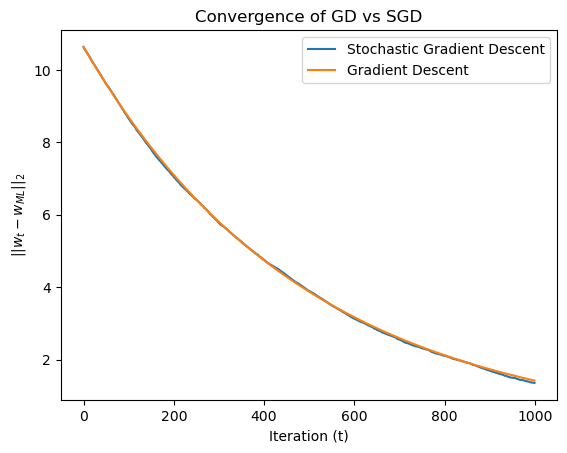

In [18]:
plt.plot(range(num_iterations), Euclidean_distances_sgd, label='Stochastic Gradient Descent')
plt.plot(range(num_iterations), Euclidean_distances, label='Gradient Descent')
plt.xlabel('Iteration (t)')
plt.ylabel(r'$||w_t - w_{ML}||_2$')
plt.title('Convergence of GD vs SGD')
plt.legend()
plt.show()

Observations :
For Stochastic Gradient Descent (SGD):
Fluctuations: Since SGD only uses a small subset of the data, there will be fluctuations in the convergence curve. The gradient calculated on a small batch is less accurate than the full gradient, leading to noisy updates.
Faster updates: Even though SGD doesn't use the entire dataset in each update, it often converges faster because updates happen more frequently (each batch is used once per iteration).
Less computational cost: The cost per iteration is reduced due to using smaller batches.
Gradient Descent: Smooth convergence, but potentially slow depending on the learning rate and data size.
Stochastic Gradient Descent: Faster but noisier convergence, suitable for large datasets and situations where quicker updates are needed.

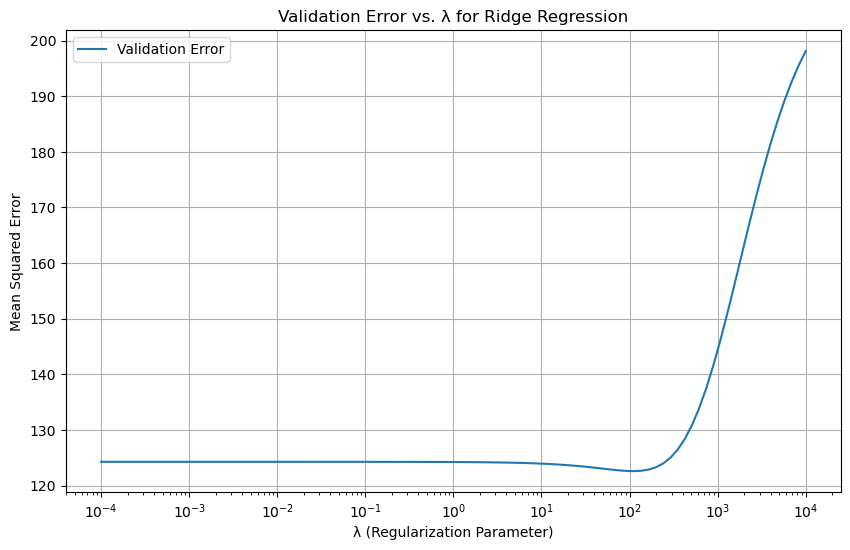

Best λ: 114.9756995397738
Test Error for w_R: 65.8984689949219
Test Error for w_ML: 65.89846899702327
w_R performs better than w_ML.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = pd.read_csv("FMLA1Q1Data_train.csv")
test_data = pd.read_csv("FMLA1Q1Data_test.csv")

# Prepare the training data
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Add bias term to the training and test data
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Gradient Descent for Ridge Regression
def ridge_regression_gd(X, y, lambda_, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    for _ in range(iterations):
        predictions = X.dot(w)
        errors = predictions - y
        gradient = (2/m) * (X.T.dot(errors) + lambda_ * w)
        w -= learning_rate * gradient
    return w

# Cross-validation for various choices of lambda
lambdas = np.logspace(-4, 4, 100)
train_errors = []
val_errors = []

# Splitting the training data for cross-validation
split_index = int(len(X_train) * 0.8)
X_val = X_train_bias[split_index:]
y_val = y_train[split_index:]
X_train_cv = X_train_bias[:split_index]
y_train_cv = y_train[:split_index]

for lambda_ in lambdas:
    w_R = ridge_regression_gd(X_train_cv, y_train_cv, lambda_)
    val_predictions = X_val.dot(w_R)
    val_error = np.mean((val_predictions - y_val) ** 2)
    val_errors.append(val_error)

# Plot the validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, val_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Error vs. λ for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# Best lambda selection
best_lambda = lambdas[np.argmin(val_errors)]
print(f"Best λ: {best_lambda}")

# Obtain w_R for the best λ
w_R_best = ridge_regression_gd(X_train_bias, y_train, best_lambda)

# Calculate test error for w_R
test_predictions_R = X_test_bias.dot(w_R_best)
test_error_R = np.mean((test_predictions_R - y_test) ** 2)
print(f"Test Error for w_R: {test_error_R}")

# Calculate test error for w_ML (using analytical solution)
XT_test = np.transpose(X_train_bias)
XXT_test = np.dot(XT_test, X_train_bias)
XXT_inv_test = np.linalg.inv(XXT_test + best_lambda * np.eye(XXT_test.shape[0]))  # Ridge adjustment
XY_test = np.dot(XT_test, y_train)
w_ML = np.dot(XXT_inv_test, XY_test)

test_predictions_ML = X_test_bias.dot(w_ML)
test_error_ML = np.mean((test_predictions_ML - y_test) ** 2)
print(f"Test Error for w_ML: {test_error_ML}")

# Compare errors
if test_error_R < test_error_ML:
    print("w_R performs better than w_ML.")
else:
    print("w_ML performs better than w_R.")
